In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,recall_score,precision_score,f1_score
import math

In [ ]:
# 1. Load the dataset
data=pd.read_csv('/content/hp_data.csv')

In [ ]:
# 2. Data preprocessing
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
if 'place' in data.columns:
  enc=LabelEncoder()
  data['place']=enc.fit_transform(data['place'])
data.info()
data.describe()
print(data.head(1))
print(data.tail(1))

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 0 to 371
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   place       15 non-null     int64 
 1   built       15 non-null     object
 2   sqft        15 non-null     int64 
 3   sale        15 non-null     object
 4   yearsOld    15 non-null     int64 
 5   floor       15 non-null     int64 
 6   totalFloor  15 non-null     int64 
 7   bhk         15 non-null     int64 
 8   price       15 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.2+ KB
   place                 built  sqft    sale  yearsOld  floor  totalFloor  \
0      2  Super built-up  Area  1450  Resale         5      1           4   

   bhk    price  
0    1  6300000  
     place                 built  sqft    sale  yearsOld  floor  totalFloor  \
371      5  Super built-up  Area  4856  Resale        10      3           4   

     bhk     price  
371    3  39000000  


In [ ]:
# 3. Define input and output variables
X=data[['sqft','place','yearsOld','totalFloor','bhk']]
Y=data['price']

In [ ]:
# 4. Split data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [ ]:
# 5. Train dataset
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# 6. Make estimation
Y_predict=model.predict(X_test)

In [ ]:
# 7. Model evaluations
r2=r2_score(Y_test,Y_predict)
mae=mean_absolute_error(Y_test,Y_predict)
mse=mean_squared_error(Y_test,Y_predict)
rmse=math.sqrt(mse)
print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R2 Score: 0.21969322636239097
Mean Absolute Error: 1992774.2669068791
Mean Squared Error: 4217480080833.913
Root Mean Squared Error: 2053650.428099659


In [ ]:
# 8. Extract model parameters
intercept=model.intercept_
coefficients=model.coef_
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: -11426565.20068214
Coefficients: [   10618.75147368    67537.57859201   -82912.18720418  1898522.63848618
 -1936370.10782544]


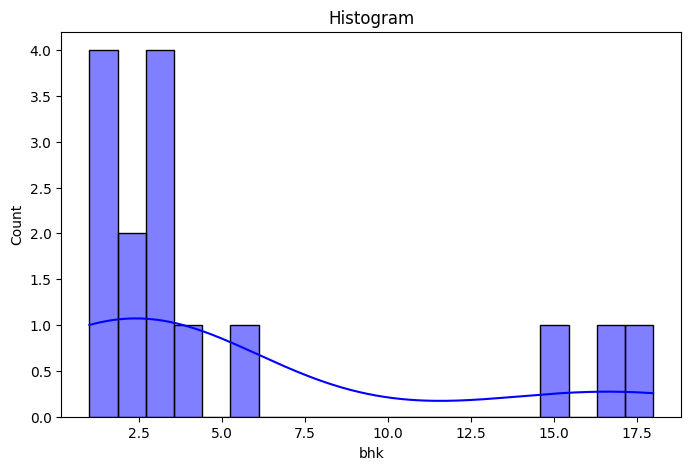

In [ ]:
# 9. Data visualization-Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['bhk'], bins=20, kde=True, color='blue')
plt.title('Histogram')
plt.show()

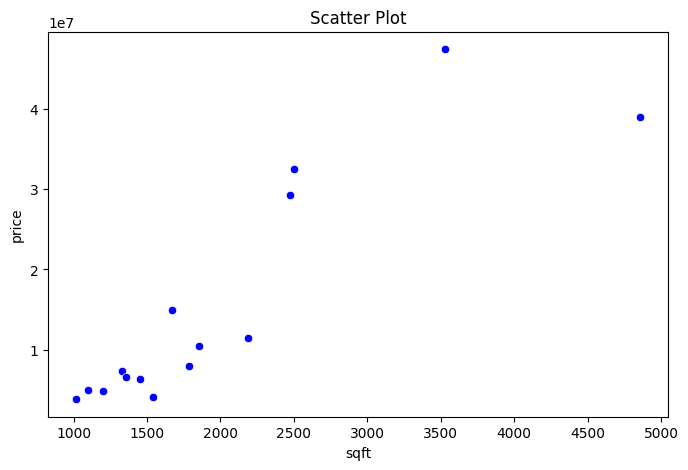

In [ ]:
# 10. Data Visualization-Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sqft', y='price', data=data, color='blue')
plt.title('Scatter Plot')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

In [42]:
# 11. Define features and target
X_lr = data.drop('bhk', axis=1)
y_lr = data['bhk']

In [41]:
# 12. Statistical methods
X_lr['mean'] = X_lr.mean(axis=1,numeric_only=True)
X_lr['median'] = X_lr.median(axis=1,numeric_only=True)
X_lr['std_dev'] = X_lr.std(axis=1,numeric_only=True)
X_lr['min'] = X_lr.min(axis=1,numeric_only=True)
X_lr['max'] = X_lr.max(axis=1,numeric_only=True)

# Print additional features
print("Additional Features for Naive Bayes:")
print(X_lr[['mean', 'median', 'std_dev', 'min', 'max']].head())

Additional Features for Naive Bayes:
           mean  median       std_dev  min         max
0  1.050244e+06     5.0  2.205093e+06  1.0   6300000.0
1  1.917036e+06    14.0  4.025196e+06  3.0  11500000.0
2  6.335065e+05    12.0  1.330047e+06  1.0   3800000.0
3  1.750314e+06    15.0  3.675187e+06  1.0  10500000.0
5  2.500284e+06    10.0  5.250326e+06  3.0  15000000.0
